In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

training_points = 1000

class ODENet(tf.keras.Model):
    def __init__(self):
        super(ODENet, self).__init__()
        self.dense1 = tf.keras.layers.Input(shape = (1,))
        self.dense2 = tf.keras.layers.Dense(100, activation='tanh')
        self.dense3 = tf.keras.layers.Dense(1)

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        return self.dense3(x)

model = ODENet()

# differential equation 
# y'' = x, y(0) = 0, y(1) = 0

def f(x):
    return x

# Define the analytical solution
def true_y(t):
    return(1/6)*t*((t**2)-1)

In [3]:
def loss_fn(model, x):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        y = model(x)
        dy_dx = tape.gradient(y, x)
    d2y_dx2 = tape.gradient(dy_dx, x)

    # Residual from the differential equation
    
    residual = d2y_dx2 - f(x)

    # Calculate the loss as the squared error
    loss = tf.reduce_mean(tf.square(residual))

    # Add boundary conditions to the loss
    loss += (tf.square(model(0) - f(0))) * 0.5
    loss += (tf.square(model(1)-f(1))) * 0.5
    
    return loss

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [10]:
import tf.GradientTape as tape
def train_step(model, x):
    loss = loss_fn(model, x)
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return loss


x_samples = np.linspace(0, 1, training_points).reshape(-1, 1)
x_samples = np.array(x_samples)
#x_samples = tf.convert_to_tensor(x_samples, dtype=tf.float32)

for step in range(10000):
    loss = train_step(model, x_samples)
    if step % 1000 == 0:
        print(f"Step: {step}, Loss: {loss.numpy()}")
        
#x_test = np.linspace(0, 1, 1000).reshape(-1, 1)
#x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)  # Convert to a TensorFlow tensor
#y_pred = model(x_test)


x_test = np.linspace(0, 1, 1000).reshape(-1, 1)
#x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)  # Convert to a TensorFlow tensor
y_true = true_y(x_test)
y_pred = model(x_test)


ValueError: Passed in object [[0.        ]
 [0.001001  ]
 [0.002002  ]
 [0.003003  ]
 [0.004004  ]
 [0.00500501]
 [0.00600601]
 [0.00700701]
 [0.00800801]
 [0.00900901]
 [0.01001001]
 [0.01101101]
 [0.01201201]
 [0.01301301]
 [0.01401401]
 [0.01501502]
 [0.01601602]
 [0.01701702]
 [0.01801802]
 [0.01901902]
 [0.02002002]
 [0.02102102]
 [0.02202202]
 [0.02302302]
 [0.02402402]
 [0.02502503]
 [0.02602603]
 [0.02702703]
 [0.02802803]
 [0.02902903]
 [0.03003003]
 [0.03103103]
 [0.03203203]
 [0.03303303]
 [0.03403403]
 [0.03503504]
 [0.03603604]
 [0.03703704]
 [0.03803804]
 [0.03903904]
 [0.04004004]
 [0.04104104]
 [0.04204204]
 [0.04304304]
 [0.04404404]
 [0.04504505]
 [0.04604605]
 [0.04704705]
 [0.04804805]
 [0.04904905]
 [0.05005005]
 [0.05105105]
 [0.05205205]
 [0.05305305]
 [0.05405405]
 [0.05505506]
 [0.05605606]
 [0.05705706]
 [0.05805806]
 [0.05905906]
 [0.06006006]
 [0.06106106]
 [0.06206206]
 [0.06306306]
 [0.06406406]
 [0.06506507]
 [0.06606607]
 [0.06706707]
 [0.06806807]
 [0.06906907]
 [0.07007007]
 [0.07107107]
 [0.07207207]
 [0.07307307]
 [0.07407407]
 [0.07507508]
 [0.07607608]
 [0.07707708]
 [0.07807808]
 [0.07907908]
 [0.08008008]
 [0.08108108]
 [0.08208208]
 [0.08308308]
 [0.08408408]
 [0.08508509]
 [0.08608609]
 [0.08708709]
 [0.08808809]
 [0.08908909]
 [0.09009009]
 [0.09109109]
 [0.09209209]
 [0.09309309]
 [0.09409409]
 [0.0950951 ]
 [0.0960961 ]
 [0.0970971 ]
 [0.0980981 ]
 [0.0990991 ]
 [0.1001001 ]
 [0.1011011 ]
 [0.1021021 ]
 [0.1031031 ]
 [0.1041041 ]
 [0.10510511]
 [0.10610611]
 [0.10710711]
 [0.10810811]
 [0.10910911]
 [0.11011011]
 [0.11111111]
 [0.11211211]
 [0.11311311]
 [0.11411411]
 [0.11511512]
 [0.11611612]
 [0.11711712]
 [0.11811812]
 [0.11911912]
 [0.12012012]
 [0.12112112]
 [0.12212212]
 [0.12312312]
 [0.12412412]
 [0.12512513]
 [0.12612613]
 [0.12712713]
 [0.12812813]
 [0.12912913]
 [0.13013013]
 [0.13113113]
 [0.13213213]
 [0.13313313]
 [0.13413413]
 [0.13513514]
 [0.13613614]
 [0.13713714]
 [0.13813814]
 [0.13913914]
 [0.14014014]
 [0.14114114]
 [0.14214214]
 [0.14314314]
 [0.14414414]
 [0.14514515]
 [0.14614615]
 [0.14714715]
 [0.14814815]
 [0.14914915]
 [0.15015015]
 [0.15115115]
 [0.15215215]
 [0.15315315]
 [0.15415415]
 [0.15515516]
 [0.15615616]
 [0.15715716]
 [0.15815816]
 [0.15915916]
 [0.16016016]
 [0.16116116]
 [0.16216216]
 [0.16316316]
 [0.16416416]
 [0.16516517]
 [0.16616617]
 [0.16716717]
 [0.16816817]
 [0.16916917]
 [0.17017017]
 [0.17117117]
 [0.17217217]
 [0.17317317]
 [0.17417417]
 [0.17517518]
 [0.17617618]
 [0.17717718]
 [0.17817818]
 [0.17917918]
 [0.18018018]
 [0.18118118]
 [0.18218218]
 [0.18318318]
 [0.18418418]
 [0.18518519]
 [0.18618619]
 [0.18718719]
 [0.18818819]
 [0.18918919]
 [0.19019019]
 [0.19119119]
 [0.19219219]
 [0.19319319]
 [0.19419419]
 [0.1951952 ]
 [0.1961962 ]
 [0.1971972 ]
 [0.1981982 ]
 [0.1991992 ]
 [0.2002002 ]
 [0.2012012 ]
 [0.2022022 ]
 [0.2032032 ]
 [0.2042042 ]
 [0.20520521]
 [0.20620621]
 [0.20720721]
 [0.20820821]
 [0.20920921]
 [0.21021021]
 [0.21121121]
 [0.21221221]
 [0.21321321]
 [0.21421421]
 [0.21521522]
 [0.21621622]
 [0.21721722]
 [0.21821822]
 [0.21921922]
 [0.22022022]
 [0.22122122]
 [0.22222222]
 [0.22322322]
 [0.22422422]
 [0.22522523]
 [0.22622623]
 [0.22722723]
 [0.22822823]
 [0.22922923]
 [0.23023023]
 [0.23123123]
 [0.23223223]
 [0.23323323]
 [0.23423423]
 [0.23523524]
 [0.23623624]
 [0.23723724]
 [0.23823824]
 [0.23923924]
 [0.24024024]
 [0.24124124]
 [0.24224224]
 [0.24324324]
 [0.24424424]
 [0.24524525]
 [0.24624625]
 [0.24724725]
 [0.24824825]
 [0.24924925]
 [0.25025025]
 [0.25125125]
 [0.25225225]
 [0.25325325]
 [0.25425425]
 [0.25525526]
 [0.25625626]
 [0.25725726]
 [0.25825826]
 [0.25925926]
 [0.26026026]
 [0.26126126]
 [0.26226226]
 [0.26326326]
 [0.26426426]
 [0.26526527]
 [0.26626627]
 [0.26726727]
 [0.26826827]
 [0.26926927]
 [0.27027027]
 [0.27127127]
 [0.27227227]
 [0.27327327]
 [0.27427427]
 [0.27527528]
 [0.27627628]
 [0.27727728]
 [0.27827828]
 [0.27927928]
 [0.28028028]
 [0.28128128]
 [0.28228228]
 [0.28328328]
 [0.28428428]
 [0.28528529]
 [0.28628629]
 [0.28728729]
 [0.28828829]
 [0.28928929]
 [0.29029029]
 [0.29129129]
 [0.29229229]
 [0.29329329]
 [0.29429429]
 [0.2952953 ]
 [0.2962963 ]
 [0.2972973 ]
 [0.2982983 ]
 [0.2992993 ]
 [0.3003003 ]
 [0.3013013 ]
 [0.3023023 ]
 [0.3033033 ]
 [0.3043043 ]
 [0.30530531]
 [0.30630631]
 [0.30730731]
 [0.30830831]
 [0.30930931]
 [0.31031031]
 [0.31131131]
 [0.31231231]
 [0.31331331]
 [0.31431431]
 [0.31531532]
 [0.31631632]
 [0.31731732]
 [0.31831832]
 [0.31931932]
 [0.32032032]
 [0.32132132]
 [0.32232232]
 [0.32332332]
 [0.32432432]
 [0.32532533]
 [0.32632633]
 [0.32732733]
 [0.32832833]
 [0.32932933]
 [0.33033033]
 [0.33133133]
 [0.33233233]
 [0.33333333]
 [0.33433433]
 [0.33533534]
 [0.33633634]
 [0.33733734]
 [0.33833834]
 [0.33933934]
 [0.34034034]
 [0.34134134]
 [0.34234234]
 [0.34334334]
 [0.34434434]
 [0.34534535]
 [0.34634635]
 [0.34734735]
 [0.34834835]
 [0.34934935]
 [0.35035035]
 [0.35135135]
 [0.35235235]
 [0.35335335]
 [0.35435435]
 [0.35535536]
 [0.35635636]
 [0.35735736]
 [0.35835836]
 [0.35935936]
 [0.36036036]
 [0.36136136]
 [0.36236236]
 [0.36336336]
 [0.36436436]
 [0.36536537]
 [0.36636637]
 [0.36736737]
 [0.36836837]
 [0.36936937]
 [0.37037037]
 [0.37137137]
 [0.37237237]
 [0.37337337]
 [0.37437437]
 [0.37537538]
 [0.37637638]
 [0.37737738]
 [0.37837838]
 [0.37937938]
 [0.38038038]
 [0.38138138]
 [0.38238238]
 [0.38338338]
 [0.38438438]
 [0.38538539]
 [0.38638639]
 [0.38738739]
 [0.38838839]
 [0.38938939]
 [0.39039039]
 [0.39139139]
 [0.39239239]
 [0.39339339]
 [0.39439439]
 [0.3953954 ]
 [0.3963964 ]
 [0.3973974 ]
 [0.3983984 ]
 [0.3993994 ]
 [0.4004004 ]
 [0.4014014 ]
 [0.4024024 ]
 [0.4034034 ]
 [0.4044044 ]
 [0.40540541]
 [0.40640641]
 [0.40740741]
 [0.40840841]
 [0.40940941]
 [0.41041041]
 [0.41141141]
 [0.41241241]
 [0.41341341]
 [0.41441441]
 [0.41541542]
 [0.41641642]
 [0.41741742]
 [0.41841842]
 [0.41941942]
 [0.42042042]
 [0.42142142]
 [0.42242242]
 [0.42342342]
 [0.42442442]
 [0.42542543]
 [0.42642643]
 [0.42742743]
 [0.42842843]
 [0.42942943]
 [0.43043043]
 [0.43143143]
 [0.43243243]
 [0.43343343]
 [0.43443443]
 [0.43543544]
 [0.43643644]
 [0.43743744]
 [0.43843844]
 [0.43943944]
 [0.44044044]
 [0.44144144]
 [0.44244244]
 [0.44344344]
 [0.44444444]
 [0.44544545]
 [0.44644645]
 [0.44744745]
 [0.44844845]
 [0.44944945]
 [0.45045045]
 [0.45145145]
 [0.45245245]
 [0.45345345]
 [0.45445445]
 [0.45545546]
 [0.45645646]
 [0.45745746]
 [0.45845846]
 [0.45945946]
 [0.46046046]
 [0.46146146]
 [0.46246246]
 [0.46346346]
 [0.46446446]
 [0.46546547]
 [0.46646647]
 [0.46746747]
 [0.46846847]
 [0.46946947]
 [0.47047047]
 [0.47147147]
 [0.47247247]
 [0.47347347]
 [0.47447447]
 [0.47547548]
 [0.47647648]
 [0.47747748]
 [0.47847848]
 [0.47947948]
 [0.48048048]
 [0.48148148]
 [0.48248248]
 [0.48348348]
 [0.48448448]
 [0.48548549]
 [0.48648649]
 [0.48748749]
 [0.48848849]
 [0.48948949]
 [0.49049049]
 [0.49149149]
 [0.49249249]
 [0.49349349]
 [0.49449449]
 [0.4954955 ]
 [0.4964965 ]
 [0.4974975 ]
 [0.4984985 ]
 [0.4994995 ]
 [0.5005005 ]
 [0.5015015 ]
 [0.5025025 ]
 [0.5035035 ]
 [0.5045045 ]
 [0.50550551]
 [0.50650651]
 [0.50750751]
 [0.50850851]
 [0.50950951]
 [0.51051051]
 [0.51151151]
 [0.51251251]
 [0.51351351]
 [0.51451451]
 [0.51551552]
 [0.51651652]
 [0.51751752]
 [0.51851852]
 [0.51951952]
 [0.52052052]
 [0.52152152]
 [0.52252252]
 [0.52352352]
 [0.52452452]
 [0.52552553]
 [0.52652653]
 [0.52752753]
 [0.52852853]
 [0.52952953]
 [0.53053053]
 [0.53153153]
 [0.53253253]
 [0.53353353]
 [0.53453453]
 [0.53553554]
 [0.53653654]
 [0.53753754]
 [0.53853854]
 [0.53953954]
 [0.54054054]
 [0.54154154]
 [0.54254254]
 [0.54354354]
 [0.54454454]
 [0.54554555]
 [0.54654655]
 [0.54754755]
 [0.54854855]
 [0.54954955]
 [0.55055055]
 [0.55155155]
 [0.55255255]
 [0.55355355]
 [0.55455455]
 [0.55555556]
 [0.55655656]
 [0.55755756]
 [0.55855856]
 [0.55955956]
 [0.56056056]
 [0.56156156]
 [0.56256256]
 [0.56356356]
 [0.56456456]
 [0.56556557]
 [0.56656657]
 [0.56756757]
 [0.56856857]
 [0.56956957]
 [0.57057057]
 [0.57157157]
 [0.57257257]
 [0.57357357]
 [0.57457457]
 [0.57557558]
 [0.57657658]
 [0.57757758]
 [0.57857858]
 [0.57957958]
 [0.58058058]
 [0.58158158]
 [0.58258258]
 [0.58358358]
 [0.58458458]
 [0.58558559]
 [0.58658659]
 [0.58758759]
 [0.58858859]
 [0.58958959]
 [0.59059059]
 [0.59159159]
 [0.59259259]
 [0.59359359]
 [0.59459459]
 [0.5955956 ]
 [0.5965966 ]
 [0.5975976 ]
 [0.5985986 ]
 [0.5995996 ]
 [0.6006006 ]
 [0.6016016 ]
 [0.6026026 ]
 [0.6036036 ]
 [0.6046046 ]
 [0.60560561]
 [0.60660661]
 [0.60760761]
 [0.60860861]
 [0.60960961]
 [0.61061061]
 [0.61161161]
 [0.61261261]
 [0.61361361]
 [0.61461461]
 [0.61561562]
 [0.61661662]
 [0.61761762]
 [0.61861862]
 [0.61961962]
 [0.62062062]
 [0.62162162]
 [0.62262262]
 [0.62362362]
 [0.62462462]
 [0.62562563]
 [0.62662663]
 [0.62762763]
 [0.62862863]
 [0.62962963]
 [0.63063063]
 [0.63163163]
 [0.63263263]
 [0.63363363]
 [0.63463463]
 [0.63563564]
 [0.63663664]
 [0.63763764]
 [0.63863864]
 [0.63963964]
 [0.64064064]
 [0.64164164]
 [0.64264264]
 [0.64364364]
 [0.64464464]
 [0.64564565]
 [0.64664665]
 [0.64764765]
 [0.64864865]
 [0.64964965]
 [0.65065065]
 [0.65165165]
 [0.65265265]
 [0.65365365]
 [0.65465465]
 [0.65565566]
 [0.65665666]
 [0.65765766]
 [0.65865866]
 [0.65965966]
 [0.66066066]
 [0.66166166]
 [0.66266266]
 [0.66366366]
 [0.66466466]
 [0.66566567]
 [0.66666667]
 [0.66766767]
 [0.66866867]
 [0.66966967]
 [0.67067067]
 [0.67167167]
 [0.67267267]
 [0.67367367]
 [0.67467467]
 [0.67567568]
 [0.67667668]
 [0.67767768]
 [0.67867868]
 [0.67967968]
 [0.68068068]
 [0.68168168]
 [0.68268268]
 [0.68368368]
 [0.68468468]
 [0.68568569]
 [0.68668669]
 [0.68768769]
 [0.68868869]
 [0.68968969]
 [0.69069069]
 [0.69169169]
 [0.69269269]
 [0.69369369]
 [0.69469469]
 [0.6956957 ]
 [0.6966967 ]
 [0.6976977 ]
 [0.6986987 ]
 [0.6996997 ]
 [0.7007007 ]
 [0.7017017 ]
 [0.7027027 ]
 [0.7037037 ]
 [0.7047047 ]
 [0.70570571]
 [0.70670671]
 [0.70770771]
 [0.70870871]
 [0.70970971]
 [0.71071071]
 [0.71171171]
 [0.71271271]
 [0.71371371]
 [0.71471471]
 [0.71571572]
 [0.71671672]
 [0.71771772]
 [0.71871872]
 [0.71971972]
 [0.72072072]
 [0.72172172]
 [0.72272272]
 [0.72372372]
 [0.72472472]
 [0.72572573]
 [0.72672673]
 [0.72772773]
 [0.72872873]
 [0.72972973]
 [0.73073073]
 [0.73173173]
 [0.73273273]
 [0.73373373]
 [0.73473473]
 [0.73573574]
 [0.73673674]
 [0.73773774]
 [0.73873874]
 [0.73973974]
 [0.74074074]
 [0.74174174]
 [0.74274274]
 [0.74374374]
 [0.74474474]
 [0.74574575]
 [0.74674675]
 [0.74774775]
 [0.74874875]
 [0.74974975]
 [0.75075075]
 [0.75175175]
 [0.75275275]
 [0.75375375]
 [0.75475475]
 [0.75575576]
 [0.75675676]
 [0.75775776]
 [0.75875876]
 [0.75975976]
 [0.76076076]
 [0.76176176]
 [0.76276276]
 [0.76376376]
 [0.76476476]
 [0.76576577]
 [0.76676677]
 [0.76776777]
 [0.76876877]
 [0.76976977]
 [0.77077077]
 [0.77177177]
 [0.77277277]
 [0.77377377]
 [0.77477477]
 [0.77577578]
 [0.77677678]
 [0.77777778]
 [0.77877878]
 [0.77977978]
 [0.78078078]
 [0.78178178]
 [0.78278278]
 [0.78378378]
 [0.78478478]
 [0.78578579]
 [0.78678679]
 [0.78778779]
 [0.78878879]
 [0.78978979]
 [0.79079079]
 [0.79179179]
 [0.79279279]
 [0.79379379]
 [0.79479479]
 [0.7957958 ]
 [0.7967968 ]
 [0.7977978 ]
 [0.7987988 ]
 [0.7997998 ]
 [0.8008008 ]
 [0.8018018 ]
 [0.8028028 ]
 [0.8038038 ]
 [0.8048048 ]
 [0.80580581]
 [0.80680681]
 [0.80780781]
 [0.80880881]
 [0.80980981]
 [0.81081081]
 [0.81181181]
 [0.81281281]
 [0.81381381]
 [0.81481481]
 [0.81581582]
 [0.81681682]
 [0.81781782]
 [0.81881882]
 [0.81981982]
 [0.82082082]
 [0.82182182]
 [0.82282282]
 [0.82382382]
 [0.82482482]
 [0.82582583]
 [0.82682683]
 [0.82782783]
 [0.82882883]
 [0.82982983]
 [0.83083083]
 [0.83183183]
 [0.83283283]
 [0.83383383]
 [0.83483483]
 [0.83583584]
 [0.83683684]
 [0.83783784]
 [0.83883884]
 [0.83983984]
 [0.84084084]
 [0.84184184]
 [0.84284284]
 [0.84384384]
 [0.84484484]
 [0.84584585]
 [0.84684685]
 [0.84784785]
 [0.84884885]
 [0.84984985]
 [0.85085085]
 [0.85185185]
 [0.85285285]
 [0.85385385]
 [0.85485485]
 [0.85585586]
 [0.85685686]
 [0.85785786]
 [0.85885886]
 [0.85985986]
 [0.86086086]
 [0.86186186]
 [0.86286286]
 [0.86386386]
 [0.86486486]
 [0.86586587]
 [0.86686687]
 [0.86786787]
 [0.86886887]
 [0.86986987]
 [0.87087087]
 [0.87187187]
 [0.87287287]
 [0.87387387]
 [0.87487487]
 [0.87587588]
 [0.87687688]
 [0.87787788]
 [0.87887888]
 [0.87987988]
 [0.88088088]
 [0.88188188]
 [0.88288288]
 [0.88388388]
 [0.88488488]
 [0.88588589]
 [0.88688689]
 [0.88788789]
 [0.88888889]
 [0.88988989]
 [0.89089089]
 [0.89189189]
 [0.89289289]
 [0.89389389]
 [0.89489489]
 [0.8958959 ]
 [0.8968969 ]
 [0.8978979 ]
 [0.8988989 ]
 [0.8998999 ]
 [0.9009009 ]
 [0.9019019 ]
 [0.9029029 ]
 [0.9039039 ]
 [0.9049049 ]
 [0.90590591]
 [0.90690691]
 [0.90790791]
 [0.90890891]
 [0.90990991]
 [0.91091091]
 [0.91191191]
 [0.91291291]
 [0.91391391]
 [0.91491491]
 [0.91591592]
 [0.91691692]
 [0.91791792]
 [0.91891892]
 [0.91991992]
 [0.92092092]
 [0.92192192]
 [0.92292292]
 [0.92392392]
 [0.92492492]
 [0.92592593]
 [0.92692693]
 [0.92792793]
 [0.92892893]
 [0.92992993]
 [0.93093093]
 [0.93193193]
 [0.93293293]
 [0.93393393]
 [0.93493493]
 [0.93593594]
 [0.93693694]
 [0.93793794]
 [0.93893894]
 [0.93993994]
 [0.94094094]
 [0.94194194]
 [0.94294294]
 [0.94394394]
 [0.94494494]
 [0.94594595]
 [0.94694695]
 [0.94794795]
 [0.94894895]
 [0.94994995]
 [0.95095095]
 [0.95195195]
 [0.95295295]
 [0.95395395]
 [0.95495495]
 [0.95595596]
 [0.95695696]
 [0.95795796]
 [0.95895896]
 [0.95995996]
 [0.96096096]
 [0.96196196]
 [0.96296296]
 [0.96396396]
 [0.96496496]
 [0.96596597]
 [0.96696697]
 [0.96796797]
 [0.96896897]
 [0.96996997]
 [0.97097097]
 [0.97197197]
 [0.97297297]
 [0.97397397]
 [0.97497497]
 [0.97597598]
 [0.97697698]
 [0.97797798]
 [0.97897898]
 [0.97997998]
 [0.98098098]
 [0.98198198]
 [0.98298298]
 [0.98398398]
 [0.98498498]
 [0.98598599]
 [0.98698699]
 [0.98798799]
 [0.98898899]
 [0.98998999]
 [0.99099099]
 [0.99199199]
 [0.99299299]
 [0.99399399]
 [0.99499499]
 [0.995996  ]
 [0.996997  ]
 [0.997998  ]
 [0.998999  ]
 [1.        ]] of type 'ndarray', not tf.Tensor or tf.Variable or ExtensionType.

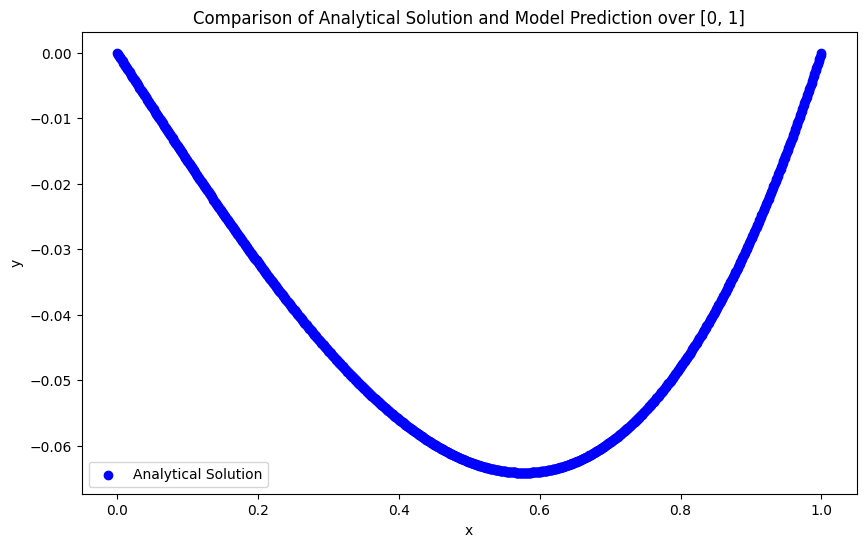

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_true, label='Analytical Solution', color='blue')
#plt.plot(x_test, y_pred, label='Model Prediction', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Analytical Solution and Model Prediction over [0, 1]')
plt.show()